In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
a = np.array([1, 2, 1.5, 1.2, 1.6, 1.4, 1.3, 1.5, 1.7, 1.8])
b = np.array([1.1, 2.1, 1.6, 1.3, 1.7, 1.5, 1.4, 1.6, 1.8, 1.9]) + 1
c = np.array([1.2, 2.2, 1.7, 1.4, 1.8, 1.6, 1.5, 1.7, 1.9, 2.0]) + 2

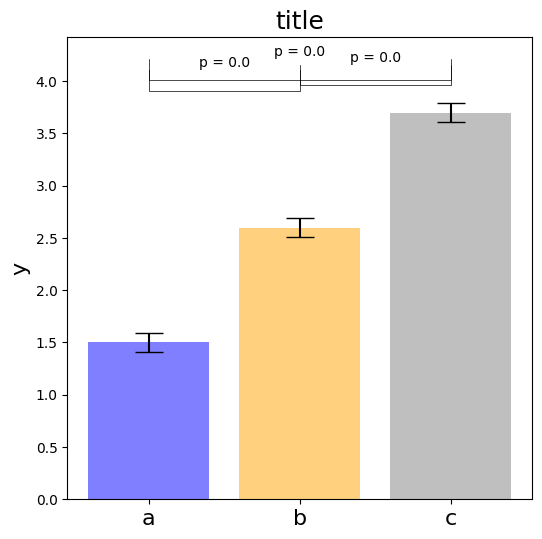

In [12]:
### statistics for unique/AllMethod ratio of the methods
# Perform independent t-tests
ttest_1_2 = stats.ttest_ind(a, b, equal_var=False)
ttest_1_3 = stats.ttest_ind(a, c, equal_var=False)
ttest_2_3 = stats.ttest_ind(b, c, equal_var=False)

# Create bar plot with error bars
means = [np.mean(a), np.mean(b), np.mean(c)]
sems = [stats.sem(a), stats.sem(b), stats.sem(c)]
labels = ['1', '2', '3']
def add_significance_text(ax, x1, x2, y, h, p_value, offset_index):
    """
    Add a line and significance label ('ns' for not significant, '*' for significant) 
    between two bars at staggered heights.
    
    Parameters:
    ax: The axis object to add the annotation to.
    x1, x2: The x positions of the bars to compare.
    y: The y position of the line end.
    h: The height of the lines connecting the bars.
    p_value: The p-value used to determine if a star should be added.
    offset_index: The index to determine the height offset for staggered lines.
    """
    # Stagger the heights of the lines
    stagger = 0.05 * offset_index
    ax.plot([x1, x1, x2, x2], [y+h+stagger, y+stagger, y+stagger, y+h+stagger], lw=0.5, c='k')
    # Based on the p-value, choose the label
    # label = '*' if p_value < 0.05 else 'ns'
    # if p_value >= 0.05:
    #     label = 'ns'
    # elif p_value<0.05 and p_value>=0.01:
    #     label = '*'
    # elif p_value<0.01 and p_value>=0.001:
    #     label = '**'
    # else:
    #     label = '***'
    # Output to the fourth decimal place
    p_value = round(p_value, 4)
    label = 'p = ' + str(p_value)
    # labelname = 'p = ' + str(p_value)
    # label = labelname if p_value < 0.05 else 'ns'
    ax.text((x1+x2)*0.5, y+h+stagger, label, ha='center', va='bottom', color='k')

# Create a new plot with staggered significance lines
fig, ax = plt.subplots(figsize=(6, 6))

# Bar plot
bars = ax.bar(labels, means, yerr=sems, capsize=10, color=['blue', 'orange', 'grey'], alpha=0.5)

# Calculate the y position for the significance line, which will be above the error bars
y_offsets = [sem * 1.5 for sem in sems]  # This will be the distance above the error bars
y_values = [mean + offset for mean, offset in zip(means, y_offsets)]

# The maximum y value for drawing the significance lines
max_y = max(y_values) + 0.02

# Add staggered significance lines
# The offset_index parameter will stagger the heights of the significance lines
add_significance_text(ax, 0, 1, max_y, 0.2, ttest_1_2.pvalue, 1)
add_significance_text(ax, 1, 2, max_y, 0.2, ttest_2_3.pvalue, 2)
add_significance_text(ax, 0, 2, max_y, 0.2, ttest_1_3.pvalue, 3)

# Set labels and title
ax.set_ylabel('y', fontsize=16)
ax.set_title('title', fontsize=18)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(['a', 'b', 'c'])
ax.tick_params(axis='x', labelsize=16)
plt.show()
